In [293]:
import pandas as pd
import torch
import PIL.Image
from torchvision import transforms
import  numpy as np
import  torch
import torchvision
import torch.nn.functional as F
from torch import  nn
from torch import optim
from d2l import torch as d2l

In [294]:
data_file = "data/lungdataset_days.csv"

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', 100)


In [295]:
df = pd.read_csv(data_file,sep=';')
strlist = ['性别(1=男，2=女）','入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）','出院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）','出院时临床转归（0=临床治愈，1=病毒转阴）','首诊时有无发热（0=否，1=是）','以前曾是否患过肺炎（0=否，1=是）','病灶位置是否右上（1=是，0=否）','病灶位置是否右中（1=是，0=否）','病灶位置是否右下（1=是，0=否）','病灶位置是否左上（1=是，0=否）','病灶位置是否左下（1=是，0=否）']
df[strlist] = df[strlist].astype(np.str)

df['身高（cm）'] = df['身高（cm）'].astype(float)
print(df.dtypes)

zero_2_nan_Str = ['身高（cm）','体重(kg)','首次检查病灶体积总和（cm³）','首次检查全部病灶占全肺体积占比(%)','首次检查全部病灶的平均密度（HU）','末次检查病灶体积总和（cm³）','末次检查全部病灶占全肺体积占比(%)','末次检查全部病灶的平均密度（HU）']
df[zero_2_nan_Str] = df[zero_2_nan_Str].replace(0,np.nan)
df
# all_features
# all_features = df

序号                                           int64
年龄(岁)                                      float64
性别(1=男，2=女）                                 object
入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）     object
出院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）     object
出院时临床转归（0=临床治愈，1=病毒转阴）                      object
首次查体体温（℃）                                  float64
首诊时有无发热（0=否，1=是）                            object
身高（cm）                                     float64
体重(kg)                                     float64
既往史评分                                        int64
以前曾是否患过肺炎（0=否，1=是）                          object
病灶位置是否右上（1=是，0=否）                           object
病灶位置是否右中（1=是，0=否）                           object
病灶位置是否右下（1=是，0=否）                           object
病灶位置是否左上（1=是，0=否）                           object
病灶位置是否左下（1=是，0=否）                           object
首次检查病灶体积总和（cm³）                            float64
首次检查全部病灶占全肺体积占比(%)                         float64
首次检查全部病灶的平均密度（HU）              

,序号,年龄(岁),性别(1=男，2=女）,入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）,出院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）,出院时临床转归（0=临床治愈，1=病毒转阴）,首次查体体温（℃）,首诊时有无发热（0=否，1=是）,身高（cm）,体重(kg),既往史评分,以前曾是否患过肺炎（0=否，1=是）,病灶位置是否右上（1=是，0=否）,病灶位置是否右中（1=是，0=否）,病灶位置是否右下（1=是，0=否）,病灶位置是否左上（1=是，0=否）,病灶位置是否左下（1=是，0=否）,首次检查病灶体积总和（cm³）,首次检查全部病灶占全肺体积占比(%),首次检查全部病灶的平均密度（HU）,末次检查病灶体积总和（cm³）,末次检查全部病灶占全肺体积占比(%),末次检查全部病灶的平均密度（HU）,住院时长(天)
0,1,25.0,1.0,1.0,2.0,1.0,38.2,1.0,176.0,72.0,2,0.0,0,0,1,1,1.0,172.04,3.68,-335.00,NaN,NaN,NaN,24
1,2,29.0,1.0,2.0,2.0,1.0,36.5,0.0,165.0,70.0,0,0.0,0,0,1,0,0.0,26.49,0.53,-621.00,NaN,NaN,NaN,17
2,3,30.0,1.0,2.0,2.0,1.0,36.0,0.0,175.0,67.5,0,0.0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,13
3,4,41.0,2.0,0.0,0.0,1.0,36.5,1.0,156.0,72.5,0,0.0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,22
4,5,29.0,2.0,1.0,2.0,1.0,39.0,1.0,160.0,70.0,0,0.0,0,0,1,1,1.0,44.36,1.20,-557.00,NaN,NaN,NaN,35
5,6,22.0,1.0,1.0,1.0,1.0,36.0,1.0,162.0,47.0,1,0.0,0,0,0,0,0.0,NaN,NaN,NaN,4.82,0.09,-590.00,37
6,7,61.0,2.0,3.0,3.0,1.0,37.8,1.0,165.0,66.5,1,0.0,1,1,1,1,1.0,479.46,25.19,-346.00,NaN,NaN,NaN,41
7,8,62.0,1.0,2.0,2.0,1.0,37.6,1.0,176.0,62.0,1,0.0,1,1,1,1,1.0,808.39,22.30,-458.00,2.60,0.07,-700.00,41
8,9,62.0,2.0,2.0,2.0,1.0,37.8,1.0,160.0,73.0,1,0.0,1,1,1,1,1.0,244.55,5.61,-656.00,6.97,0.16,-766.00,26
9,10,48.0,2.0,1.0,1.0,1.0,37.5,1.0,NaN,NaN,0,0.0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,31


In [296]:
del_list = ['首次检查病灶体积总和（cm³）','首次检查全部病灶占全肺体积占比(%)','首次检查全部病灶的平均密度（HU）','末次检查病灶体积总和（cm³）','末次检查全部病灶占全肺体积占比(%)','末次检查全部病灶的平均密度（HU）']
df = df.drop(columns=del_list)
df

,序号,年龄(岁),性别(1=男，2=女）,入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）,出院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）,出院时临床转归（0=临床治愈，1=病毒转阴）,首次查体体温（℃）,首诊时有无发热（0=否，1=是）,身高（cm）,体重(kg),既往史评分,以前曾是否患过肺炎（0=否，1=是）,病灶位置是否右上（1=是，0=否）,病灶位置是否右中（1=是，0=否）,病灶位置是否右下（1=是，0=否）,病灶位置是否左上（1=是，0=否）,病灶位置是否左下（1=是，0=否）,住院时长(天)
0,1,25.0,1.0,1.0,2.0,1.0,38.2,1.0,176.0,72.0,2,0.0,0,0,1,1,1.0,24
1,2,29.0,1.0,2.0,2.0,1.0,36.5,0.0,165.0,70.0,0,0.0,0,0,1,0,0.0,17
2,3,30.0,1.0,2.0,2.0,1.0,36.0,0.0,175.0,67.5,0,0.0,0,0,0,0,0.0,13
3,4,41.0,2.0,0.0,0.0,1.0,36.5,1.0,156.0,72.5,0,0.0,0,0,0,0,0.0,22
4,5,29.0,2.0,1.0,2.0,1.0,39.0,1.0,160.0,70.0,0,0.0,0,0,1,1,1.0,35
5,6,22.0,1.0,1.0,1.0,1.0,36.0,1.0,162.0,47.0,1,0.0,0,0,0,0,0.0,37
6,7,61.0,2.0,3.0,3.0,1.0,37.8,1.0,165.0,66.5,1,0.0,1,1,1,1,1.0,41
7,8,62.0,1.0,2.0,2.0,1.0,37.6,1.0,176.0,62.0,1,0.0,1,1,1,1,1.0,41
8,9,62.0,2.0,2.0,2.0,1.0,37.8,1.0,160.0,73.0,1,0.0,1,1,1,1,1.0,26
9,10,48.0,2.0,1.0,1.0,1.0,37.5,1.0,NaN,NaN,0,0.0,0,0,0,0,0.0,31


In [297]:
from sklearn.model_selection import train_test_split
x = df.iloc[:, :-1]
y = df.iloc[:,-1]

x_train,x_test,y_train,y_test = train_test_split(
    x,y, test_size=0.1, random_state=None)
train_data = pd.concat([x_train,y_train],axis=1,join='outer')
df = df.reset_index(drop=True)

train_data = train_data.reset_index(drop=True)
# test_data = pd.concat([x_test,y_test],axis=1,join='outer')
test_data = x_test

test_data = test_data.reset_index(drop=True)
test_data

,序号,年龄(岁),性别(1=男，2=女）,入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）,出院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）,出院时临床转归（0=临床治愈，1=病毒转阴）,首次查体体温（℃）,首诊时有无发热（0=否，1=是）,身高（cm）,体重(kg),既往史评分,以前曾是否患过肺炎（0=否，1=是）,病灶位置是否右上（1=是，0=否）,病灶位置是否右中（1=是，0=否）,病灶位置是否右下（1=是，0=否）,病灶位置是否左上（1=是，0=否）,病灶位置是否左下（1=是，0=否）
0,335,39.0,1.0,3.0,3.0,1.0,38.0,1.0,NaN,86.0,0,nan,1,0,1,1,1.0
1,100,25.0,2.0,2.0,2.0,1.0,37.8,1.0,160.0,42.0,0,0.0,0,0,0,0,1.0
2,61,21.0,1.0,1.0,1.0,1.0,35.7,0.0,180.0,97.0,0,0.0,0,0,0,0,0.0
3,210,70.0,1.0,2.0,2.0,1.0,39.0,1.0,NaN,NaN,1,0.0,1,1,1,1,1.0
4,213,37.0,1.0,2.0,2.0,1.0,37.2,0.0,NaN,NaN,0,0.0,1,1,1,1,1.0
5,254,32.0,2.0,2.0,2.0,1.0,37.7,1.0,NaN,NaN,0,0.0,1,1,1,1,1.0
6,385,76.0,2.0,2.0,2.0,1.0,36.5,0.0,NaN,NaN,5,1.0,0,1,1,1,1.0
7,201,47.0,1.0,2.0,2.0,1.0,38.9,1.0,NaN,NaN,0,0.0,0,1,1,0,0.0
8,326,10.0,1.0,1.0,1.0,0.0,38.3,1.0,NaN,NaN,0,0.0,0,0,0,0,1.0
9,441,48.0,1.0,0.0,0.0,1.0,36.7,0.0,NaN,NaN,0,0.0,0,0,0,0,0.0


In [298]:
# from sklearn.model_selection import train_test_split
# x = df.iloc[:, 1:-1]
# y = df.iloc[:,12]
#
# x_train,x_test,y_train,y_test = train_test_split(
#     x,y, test_size=0.2, random_state=None)
#
# x_test

In [299]:
# all_features = pd.concat((train_data, test_data))
all_features = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))
all_features

,年龄(岁),性别(1=男，2=女）,入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）,出院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）,出院时临床转归（0=临床治愈，1=病毒转阴）,首次查体体温（℃）,首诊时有无发热（0=否，1=是）,身高（cm）,体重(kg),既往史评分,以前曾是否患过肺炎（0=否，1=是）,病灶位置是否右上（1=是，0=否）,病灶位置是否右中（1=是，0=否）,病灶位置是否右下（1=是，0=否）,病灶位置是否左上（1=是，0=否）,病灶位置是否左下（1=是，0=否）
0,59.0,2.0,2.0,2.0,1.0,37.7,1.0,NaN,NaN,3,0.0,1,1,1,0,0.0
1,6.0,2.0,2.0,2.0,1.0,36.9,0.0,NaN,NaN,0,0.0,0,0,0,0,0.0
2,48.0,1.0,1.0,2.0,1.0,38.5,1.0,150.0,60.0,0,0.0,1,0,1,1,0.0
3,3.0,2.0,1.0,1.0,0.0,36.6,0.0,NaN,NaN,0,0.0,0,0,0,0,0.0
4,50.0,1.0,2.0,2.0,1.0,35.5,0.0,171.0,74.0,0,0.0,0,1,1,1,1.0
5,60.0,2.0,2.0,1.0,1.0,36.9,0.0,NaN,58.0,0,1.0,1,0,1,0,1.0
6,17.0,2.0,1.0,1.0,0.0,37.5,1.0,NaN,58.5,0,0.0,0,0,0,0,0.0
7,24.0,1.0,1.0,2.0,1.0,38.3,1.0,170.0,65.0,0,0.0,0,0,0,0,1.0
8,35.0,2.0,1.0,1.0,1.0,37.6,1.0,157.0,58.0,0,0.0,0,0,1,0,0.0
9,49.0,1.0,1.0,2.0,1.0,37.0,0.0,165.0,87.5,1,0.0,0,0,0,0,0.0


In [300]:
# 若无法获得测试数据，则可根据训练数据计算均值和标准差
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# 在标准化数据之后，所有均值消失，因此我们可以将缺失值设置为0
all_features[numeric_features] = all_features[numeric_features].fillna(0)

In [301]:
# “Dummy_na=True”将“na”（缺失值）视为有效的特征值，并为其创建指示符特征
all_features = pd.get_dummies(all_features, dummy_na=True)
all_features.shape
all_features

,年龄(岁),首次查体体温（℃）,身高（cm）,体重(kg),既往史评分,性别(1=男，2=女）_1.0,性别(1=男，2=女）_2.0,性别(1=男，2=女）_nan,性别(1=男，2=女）_nan,入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_0.0,入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_1.0,入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_2.0,入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_3.0,入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_4.0,入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_nan,入院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_nan,出院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_0.0,出院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_1.0,出院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_2.0,出院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_3.0,出院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_4.0,出院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_nan,出院时临床分型（0=无症状感染者，1=轻型，2=普通型，3=重型，4=危重型）_nan,出院时临床转归（0=临床治愈，1=病毒转阴）_0.0,出院时临床转归（0=临床治愈，1=病毒转阴）_1.0,出院时临床转归（0=临床治愈，1=病毒转阴）_nan,出院时临床转归（0=临床治愈，1=病毒转阴）_nan,首诊时有无发热（0=否，1=是）_0.0,首诊时有无发热（0=否，1=是）_1.0,首诊时有无发热（0=否，1=是）_nan,首诊时有无发热（0=否，1=是）_nan,以前曾是否患过肺炎（0=否，1=是）_0.0,以前曾是否患过肺炎（0=否，1=是）_1.0,以前曾是否患过肺炎（0=否，1=是）_nan,以前曾是否患过肺炎（0=否，1=是）_nan,病灶位置是否右上（1=是，0=否）_0,病灶位置是否右上（1=是，0=否）_1,病灶位置是否右上（1=是，0=否）_nan,病灶位置是否右中（1=是，0=否）_0,病灶位置是否右中（1=是，0=否）_1,病灶位置是否右中（1=是，0=否）_nan,病灶位置是否右下（1=是，0=否）_0,病灶位置是否右下（1=是，0=否）_1,病灶位置是否右下（1=是，0=否）_病灶位置是否右下（1=是，0=否）,病灶位置是否右下（1=是，0=否）_nan,病灶位置是否左上（1=是，0=否）_0,病灶位置是否左上（1=是，0=否）_1,病灶位置是否左上（1=是，0=否）_nan,病灶位置是否左下（1=是，0=否）_0.0,病灶位置是否左下（1=是，0=否）_1.0,病灶位置是否左下（1=是，0=否）_nan,病灶位置是否左下（1=是，0=否）_nan
0,1.206173,0.493364,0.000000,0.000000,3.690420,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
1,-2.143942,-0.445549,0.000000,0.000000,-0.422828,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
2,0.510866,1.432277,-1.254551,-0.510186,-0.422828,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
3,-2.333571,-0.797641,0.000000,0.000000,-0.422828,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
4,0.637286,-2.088647,0.409380,0.358499,-0.422828,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
5,1.269383,-0.445549,0.000000,-0.634284,-0.422828,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
6,-1.448635,0.258636,0.000000,-0.603259,-0.422828,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
7,-1.006167,1.197549,0.330145,-0.199941,-0.422828,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
8,-0.310860,0.376000,-0.699908,-0.634284,-0.422828,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
9,0.574076,-0.328185,-0.066029,1.196160,0.948255,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0


In [302]:
n_train = train_data.shape[0]
train_features = torch.tensor(all_features[:n_train].values, dtype=torch.float32)
test_features = torch.tensor(all_features[n_train:].values, dtype=torch.float32)
train_labels = torch.tensor(
    y_train.values.reshape(-1, 1), dtype=torch.float32)

In [303]:
loss = nn.MSELoss()
in_features = train_features.shape[1]

def get_net():
    net = nn.Sequential(nn.Linear(in_features,1))
    return net

In [304]:
def log_rmse(net, features, labels):
    # 为了在取对数时进一步稳定该值，将小于1的值设置为1
    clipped_preds = torch.clamp(net(features), 1, float('inf'))
    rmse = torch.sqrt(loss(torch.log(clipped_preds),
                           torch.log(labels)))
    return rmse.item()

In [305]:
def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    train_iter = d2l.load_array((train_features, train_labels), batch_size)
    # 这里使用的是Adam优化算法
    optimizer = torch.optim.Adam(net.parameters(),
                                 lr = learning_rate,
                                 weight_decay = weight_decay)
    for epoch in range(num_epochs):
        for X, y in train_iter:
            optimizer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net, train_features, train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

In [306]:
def get_k_fold_data(k, i, X, y):
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat([X_train, X_part], 0)
            y_train = torch.cat([y_train, y_part], 0)
    return X_train, y_train, X_valid, y_valid

In [307]:
def k_fold(k, X_train, y_train, num_epochs, learning_rate, weight_decay,
           batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        net = get_net()
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        if i == 0:
            d2l.plot(list(range(1, num_epochs + 1)), [train_ls, valid_ls],
                     xlabel='epoch', ylabel='rmse', xlim=[1, num_epochs],
                     legend=['train', 'valid'], yscale='log')
        print(f'折{i + 1}，训练log rmse{float(train_ls[-1]):f}, '
              f'验证log rmse{float(valid_ls[-1]):f}')
    return train_l_sum / k, valid_l_sum / k

折1，训练log rmse1.370699, 验证log rmse1.365426
折2，训练log rmse1.400188, 验证log rmse1.497331
折3，训练log rmse1.451558, 验证log rmse1.461274
折4，训练log rmse1.465722, 验证log rmse1.447925
折5，训练log rmse1.440009, 验证log rmse1.407661
折6，训练log rmse1.426036, 验证log rmse1.456738
6-折验证: 平均训练log rmse: 1.425702, 平均验证log rmse: 1.439392


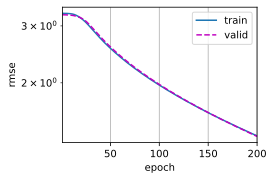

In [308]:
k, num_epochs, lr, weight_decay, batch_size = 6, 200, 0.001, 1e-4, 128
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr,
                          weight_decay, batch_size)
print(f'{k}-折验证: 平均训练log rmse: {float(train_l):f}, '
      f'平均验证log rmse: {float(valid_l):f}')

In [309]:
def train_and_pred(train_features, test_features, train_labels, test_data,
                   num_epochs, lr, weight_decay, batch_size):
    net = get_net()
    train_ls, _ = train(net, train_features, train_labels, None, None,
                        num_epochs, lr, weight_decay, batch_size)
    d2l.plot(np.arange(1, num_epochs + 1), [train_ls], xlabel='epoch',
             ylabel='log rmse', xlim=[1, num_epochs], yscale='log')
    print(f'训练log rmse：{float(train_ls[-1]):f}')
    # 将网络应用于测试集。
    preds = net(test_features).detach().numpy()
    # 将其重新格式化以导出到Kaggle
    test_data['住院时长(天)'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test_data['序号'], test_data['住院时长(天)']], axis=1)
    submission.to_excel('submission.xlsx', index=True)

训练log rmse：1.157523


PermissionError: [Errno 13] Permission denied: 'submission.xlsx'

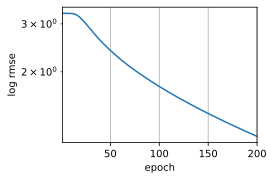

In [310]:
train_and_pred(train_features, test_features, train_labels, test_data,
               num_epochs, lr, weight_decay, batch_size)